In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [4]:
file_path = '/content/drive/MyDrive/DACN_nhóm8/DATA/df_new_cleaned.csv'
df = pd.read_csv(file_path)
# Hiển thị dữ liệu 15 dòng đầu
df.head(15)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DACN_nhóm8/DATA/df_new_cleaned.csv'

In [ ]:
# Hiển thị thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  int64  
 10  INLAND              20640 non-null  int64  
 11  ISLAND              20640 non-null  int64  
 12  NEAR BAY            20640 non-null  int64  
 13  NEAR OCEAN          20640 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


# **B2 : PHÂN TÍCH MÔ TẢ**

In [ ]:
# Chia dữ liệu làm 2 : Biến độc lập và biến phụ thuộc
X = df.drop(columns=['median_house_value'])
# Hiển thị dữ liệu chứa biến độc lập
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,0,0,0,1,0
5,-122.25,37.85,52.0,919.000,213.0,413.0,193.0,4.036800,0,0,0,1,0
6,-122.25,37.84,52.0,2535.000,489.0,1094.0,514.0,3.659100,0,0,0,1,0
7,-122.25,37.84,52.0,3104.000,687.0,1157.0,647.0,3.120000,0,0,0,1,0
8,-122.26,37.84,42.0,2555.000,665.0,1206.0,595.0,2.080400,0,0,0,1,0
9,-122.25,37.84,52.0,3549.000,707.0,1551.0,714.0,3.691200,0,0,0,1,0


In [ ]:
Y = pd.DataFrame(df['median_house_value'],columns=['median_house_value'])
# Hiển thị dữ liệu chứa biến phụ thuộc
Y.head(10)

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
5,269700.0
6,299200.0
7,241400.0
8,226700.0
9,261100.0


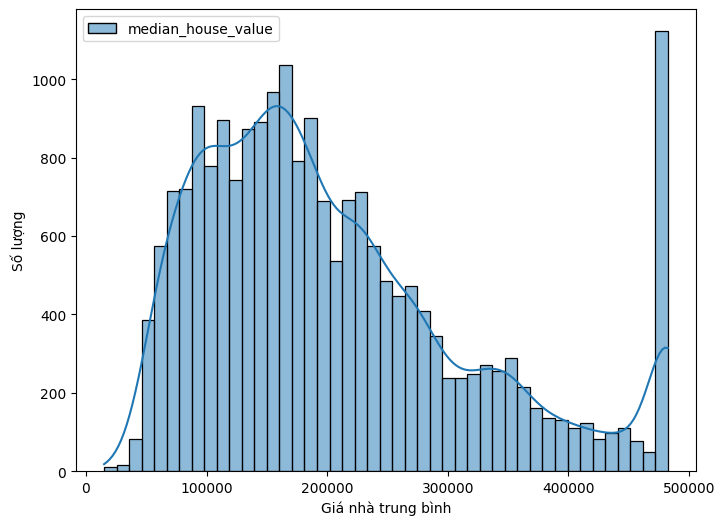

In [ ]:
#Biểu đồ thể hiện giá nhà trung bình
plt.figure(figsize=(8,6)) # kích thước
sns.histplot(Y, kde = True)
plt.xlabel('Giá nhà trung bình')
plt.ylabel('Số lượng')
plt.show()

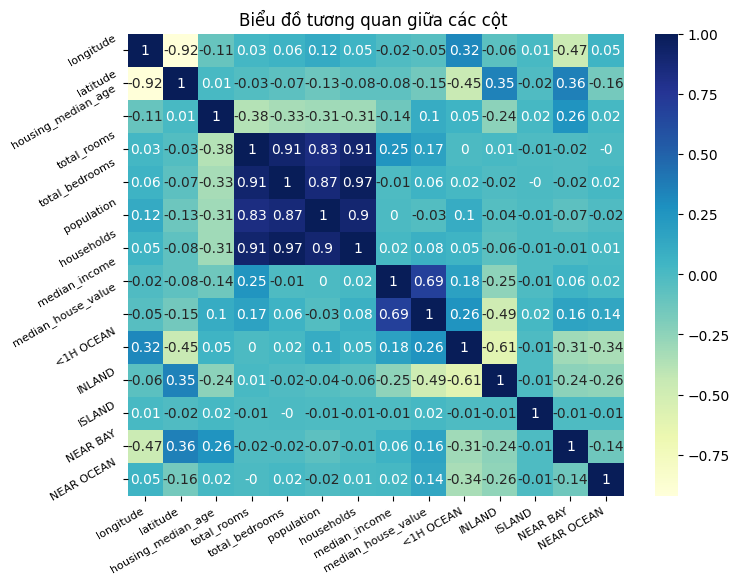

In [ ]:
# Biểu đồ tương quan giữa các cột
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.xticks(rotation=30, ha='right', fontsize = 8) # Xoay nhãn
plt.yticks(rotation=30, ha='right', fontsize = 8)
plt.title('Biểu đồ tương quan giữa các cột ')
plt.show()

In [ ]:
# loại các cột <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN để lập bảng mô tả
df_mo_ta = df.drop(columns = ['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
# Lập bảng mô tả
Bang_mo_ta = df_mo_ta.describe()
Bang_mo_ta

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2441.692472,501.182086,1336.959012,469.020107,3.801010,205981.224976
std,2.003532,2.135952,12.585558,1397.790038,284.133641,765.550830,265.507540,1.657658,113217.350152
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,5698.375000,1162.625000,3132.000000,1092.500000,8.013025,482412.500000


In [ ]:
# Lưu bảng mô tả vào tệp
Bang_mo_ta.to_csv('/content/drive/MyDrive/DACN_nhom_8/DATA/Bang_mo_ta.txt',sep='\t')

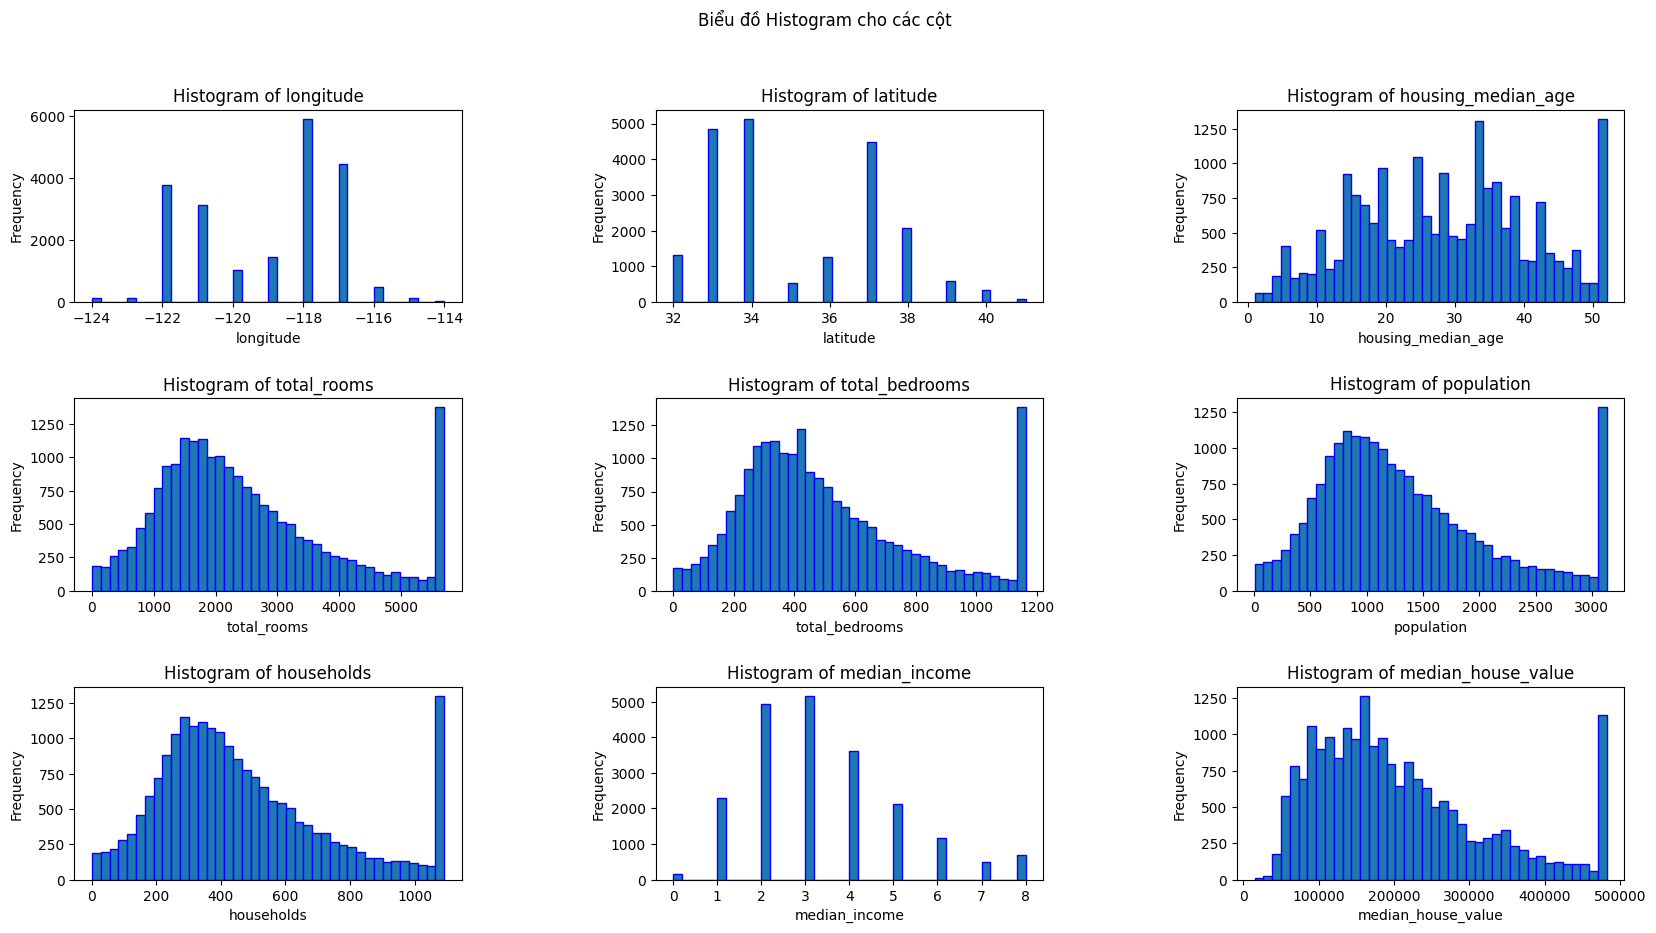

In [ ]:
# chuyển đổi dữ liệu sang dạng nguyên để vẽ biểu đồ histogram
df_hist = df_mo_ta.copy().astype(int)

fig, axes = plt.subplots(3, 3, figsize=(20, 10), gridspec_kw={'hspace': 0.5,'wspace' : 0.5})  # Tạo lưới 2x3 cho biểu đồ
fig.suptitle("Biểu đồ Histogram cho các cột")

# Lặp qua các cột trong DataFrame
for i, column in enumerate(df_hist.columns):
    row = i // 3  # Xác định hàng của biểu đồ
    col = i % 3   # Xác định cột của biểu đồ

    axes[row, col].hist(df_hist[column], bins=40, edgecolor='b')
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Frequency')

plt.show()

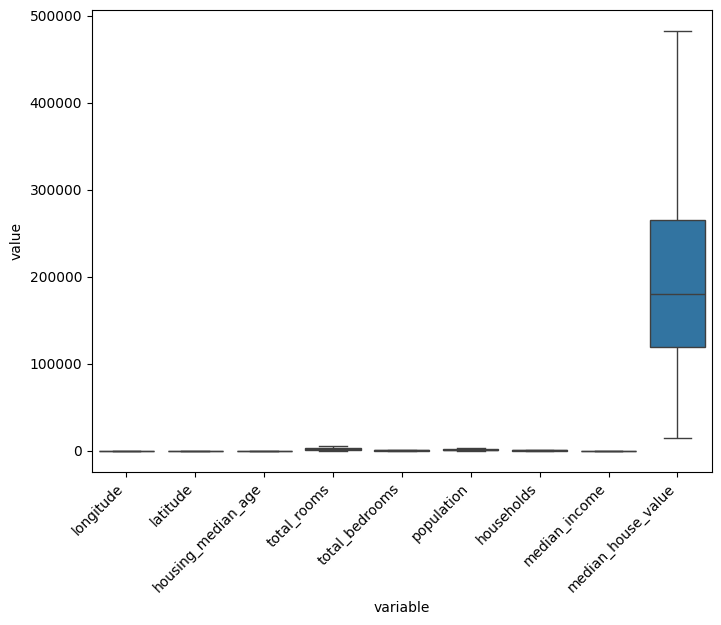

In [ ]:
# Vẽ biểu đồ Boxplot sử dụng seaborn
df_box = df.drop(columns=['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
plt.figure(figsize=(8,6)) # kich thuoc
sns.boxplot(x = 'variable', y = 'value' , data = pd.melt(df_box))
plt.xticks(rotation=45, ha='right')
plt.show()

# **B 3 : PHÂN TÍCH HỒI QUY TUYẾN TÍNH**

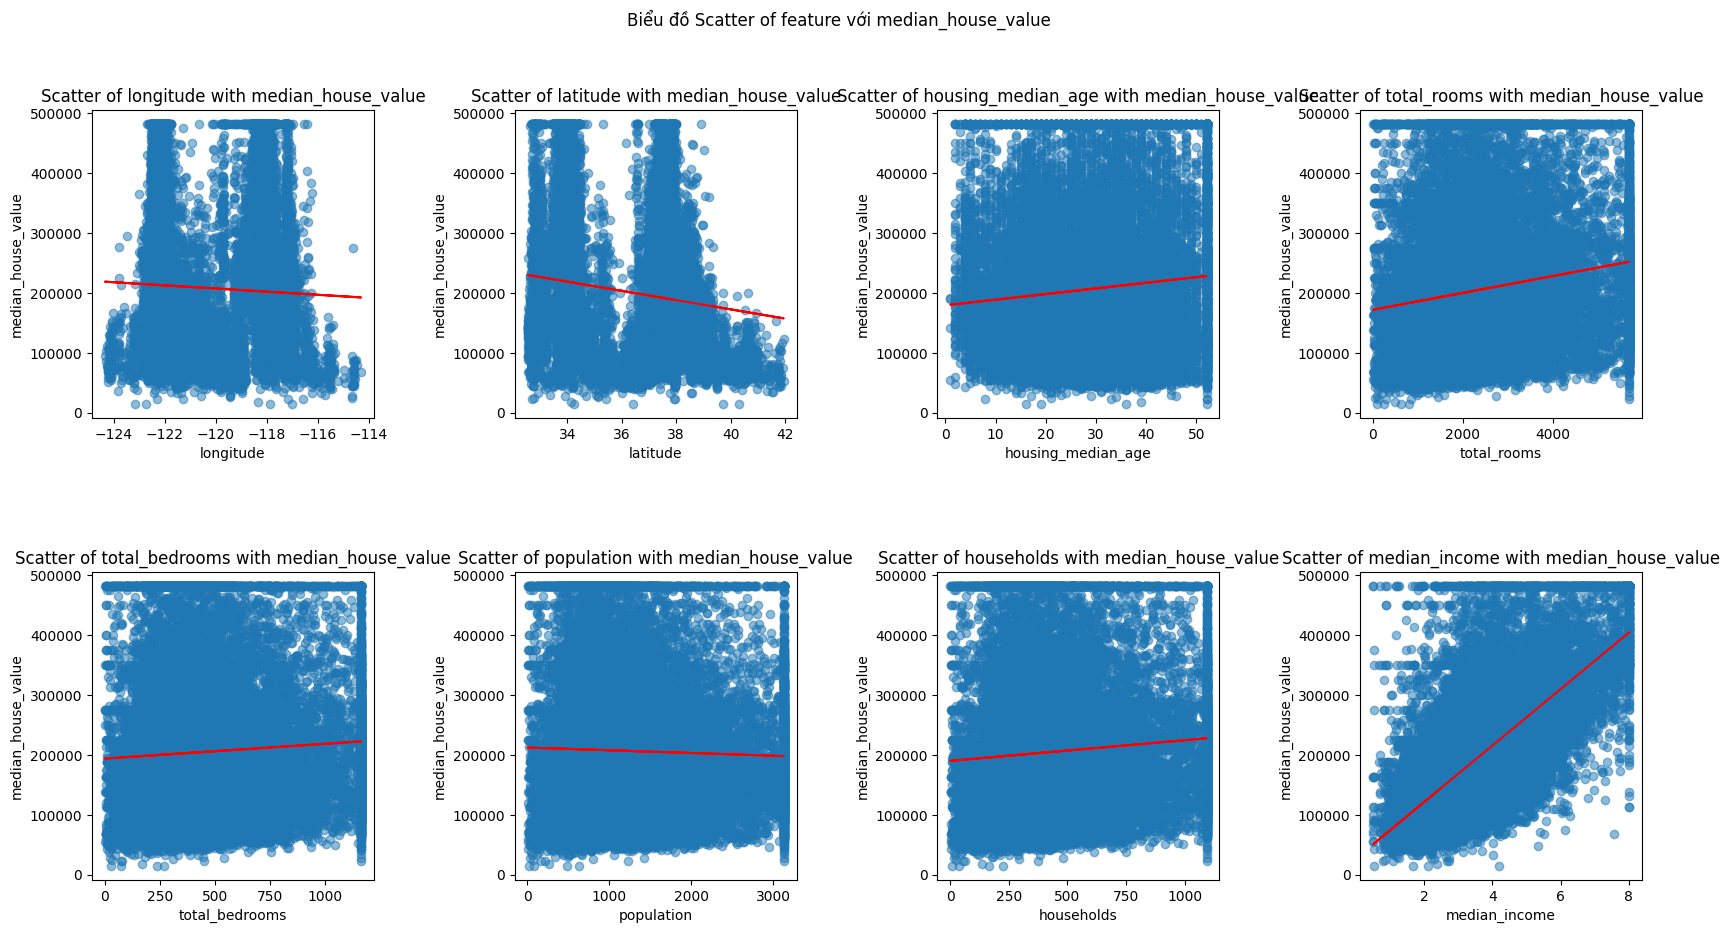

In [ ]:
# List các features trong X
features = ['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income']
# features của Y
target = ['median_house_value']
# Tạo subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 10), gridspec_kw={'hspace': 0.5,'wspace' : 0.5})  # Tạo lưới 2x3 cho biểu đồ
fig.suptitle("Biểu đồ Scatter of feature với median_house_value ")
# Vẽ biểu đồ Scatter
for i, feature in enumerate(features):
    row = i // 4  # Xác định hàng của biểu đồ
    col = i % 4   # Xác định cột của biểu đồ
    axes[row, col].scatter(X[feature], Y, alpha=0.5)
    axes[row, col].set_xlabel(f'{feature}')
    axes[row, col].set_ylabel('median_house_value')
    axes[row, col].set_title(f'Scatter of {feature} with median_house_value')
    # Tính hệ số của đường chân chính
    slope, intercept = np.polyfit(X[feature], Y, 1)
    # Vẽ đường chân chính
    axes[row, col].plot(X[feature], slope * X[feature] + intercept, color='red')

plt.show()


In [ ]:
# chia dữ liệu thành các tệp huấn luyện (70 %) và test(30 %)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
# Kiểm tra kích thước của dữ liệu
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(14447, 13)
(6192, 13)
(14447, 1)
(6192, 1)


In [ ]:
# Dữ liệu x_train
x_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7061,-118.02,33.93,35.0,2400.000,398.000,1218.0,408.0,4.1312,1,0,0,0,0
14689,-117.09,32.79,20.0,2183.000,534.000,999.0,496.0,2.8631,0,0,0,0,1
17323,-120.14,34.59,24.0,1601.000,282.000,731.0,285.0,4.2026,0,0,0,0,1
10056,-121.00,39.26,14.0,810.000,151.000,302.0,138.0,3.1094,0,1,0,0,0
15750,-122.45,37.77,52.0,3188.000,708.000,1526.0,664.0,3.3068,0,0,0,1,0
15283,-117.33,33.17,11.0,5698.375,1162.625,3132.0,1092.5,4.0791,0,0,0,0,1
18551,-122.03,36.96,28.0,1607.000,421.000,926.0,385.0,2.4250,0,0,0,0,1
7555,-118.19,33.91,33.0,915.000,225.000,826.0,212.0,2.7708,1,0,0,0,0
15700,-122.44,37.79,52.0,1817.000,535.000,800.0,487.0,3.9750,0,0,0,1,0
12364,-116.46,33.82,6.0,4863.000,920.000,3010.0,828.0,3.9508,0,1,0,0,0


In [ ]:
# Dữ liệu x_test
x_test.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.681200,0,1,0,0,0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.531300,0,1,0,0,0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.480100,0,0,0,1,0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.737600,1,0,0,0,0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.725000,0,0,0,0,1
13311,-117.61,34.08,12.0,4427.0,435.0,2400.0,843.0,4.714700,0,1,0,0,0
7113,-118.02,33.89,36.0,1375.0,435.0,670.0,221.0,5.083900,1,0,0,0,0
7668,-118.08,33.92,38.0,1335.0,435.0,1011.0,269.0,3.690800,1,0,0,0,0
18246,-122.08,37.39,4.0,2292.0,435.0,1050.0,584.0,4.803600,0,0,0,1,0
5723,-118.23,34.18,45.0,2332.0,435.0,943.0,339.0,8.013025,1,0,0,0,0


In [ ]:
# Dữ liệu y_train
y_train.head(10)

,median_house_value
7061,193800.0
14689,169700.0
17323,259800.0
10056,136100.0
15750,482412.5
15283,281300.0
18551,216100.0
7555,117400.0
15700,482412.5
12364,104200.0


In [ ]:
# Dữ liệu y_test
y_test.head(10)

,median_house_value
20046,47700.0
3024,45800.0
15663,482412.5
20484,218600.0
9814,278000.0
13311,158700.0
7113,198200.0
7668,157500.0
18246,340000.0
5723,446600.0


In [ ]:
# chuẩn hóa Min Max
minmax_scale = MinMaxScaler()
x_train_scaled = minmax_scale.fit_transform(x_train)  # Chuẩn hóa tập huấn luyện
x_test_scaled = minmax_scale.transform(x_test)  # Chuẩn hóa tập kiểm tra
#Lưu MinMaxScaler vào tệp "minmax_scaler_x.pkl" bằng pickle
with open("/content/drive/MyDrive/DACN_nhom_8/DATA/minmax_scaler_X.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)

In [ ]:
# huấn luyện mô hình (tìm hệ số a , b)
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# hệ số a , b
print('\na = ' , model.coef_)
print('\nb = ', model.intercept_)
print(f'\nY = {model.coef_}X + {model.intercept_}')


a =  [[-2.49183013e+05 -2.19455227e+05  6.50728222e+04 -1.13001631e+05
   2.61889414e+05 -2.02020462e+05  7.23612546e+04  3.57653958e+05
   1.87765562e+18  1.87765562e+18  1.87765562e+18  1.87765562e+18
   1.87765562e+18]]

b =  [-1.87765562e+18]

Y = [[-2.49183013e+05 -2.19455227e+05  6.50728222e+04 -1.13001631e+05
   2.61889414e+05 -2.02020462e+05  7.23612546e+04  3.57653958e+05
   1.87765562e+18  1.87765562e+18  1.87765562e+18  1.87765562e+18
   1.87765562e+18]]X + [-1.87765562e+18]


In [ ]:
# dự đoán với X_test và X_train
y_pred = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

In [ ]:
# Đánh giá mô hình
def rate(y_test, y_pred, y_train, y_pred_train):
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print('------------------Kết quả thẩm định trên dữ liệu huấn luyện -------------------------------')
    print('Mean Squared Error (MSE):', mse_train)
    print('R-squared (R2):', r2_train)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('------------------Kết quả thẩm định trên dữ liệu kiểm tra -------------------------------')
    print('Mean Squared Error (MSE):', mse)
    print('R-squared (R2):', r2)
    return mse_train, r2_train, mse, r2

In [ ]:
rate(y_test, y_pred, y_train, y_pred_train)

------------------Kết quả thẩm định trên dữ liệu huấn luyện -------------------------------
Mean Squared Error (MSE): 4238473157.105766
R-squared (R2): 0.671074490160668
------------------Kết quả thẩm định trên dữ liệu kiểm tra -------------------------------
Mean Squared Error (MSE): 4448074117.059552
R-squared (R2): 0.6485968222151116


(4238473157.105766, 0.671074490160668, 4448074117.059552, 0.6485968222151116)

In [ ]:
# So sánh dữ liệu thực tế với dữ liệu dự đoán
actual_values = y_test['median_house_value'].values
predicted_values = y_pred.reshape(-1)
df_result = pd.DataFrame({'Actual ': actual_values, 'Predicted': predicted_values})
df_result.head(10)

,Actual,Predicted
0,47700.0,45312.0
1,45800.0,99840.0
2,482412.5,234240.0
3,218600.0,257536.0
4,278000.0,260096.0
5,158700.0,93440.0
6,198200.0,324352.0
7,157500.0,243200.0
8,340000.0,258816.0
9,446600.0,444928.0


<Axes: >

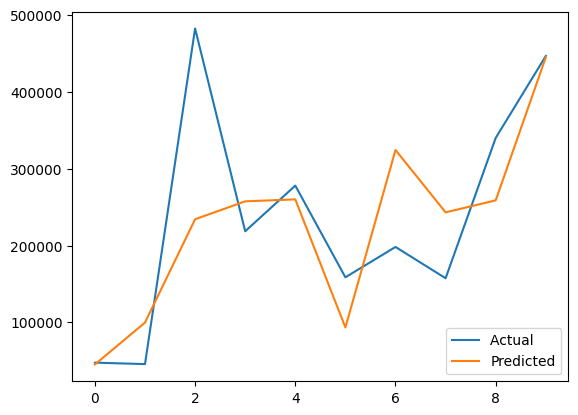

In [ ]:
# Lập biểu đồ dễ đánh giá
df_result.head(10).plot(kind = 'line')

In [ ]:
# Lưu mô hình vào file
with open('/content/drive/MyDrive/DACN_nhom_8/DATA/linear.pkl', 'wb') as file:
    pickle.dump(model, file)